### Student Name: Vaishnav Vaidheeswaran

Hypothesis:

Check Assumptions:

Perfrom statistical Test:

Result:

Post Hoc Tests:

In [1]:
#install pingouin package
%pip install pingouin

In [2]:
#import modules
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
df = pd.read_csv('merged_data.csv')
df.head(5)

,Sl.No,Age,Physical,Interpretation,Social,Interpretation.1,Temperamental,Interpretation.2,Educational,Interpretation.3,Moral,Interpretation.4,Intellectual,Interpretation.5,TOTAL,Interpretation.6,Gender,TOTAL_BAI,Interpretaion_BAI
0,1,21,31,Above average,39,High,28,Above average,27,Above average,28,Above average,22,Average,175,Above Average,M,8,Very low
1,2,18,34,High,38,High,28,Above average,32,Above average,34,High,37,High,199,High,M,14,Very low
2,3,21,33,High,21,Average,22,Average,27,Above average,34,High,27,Above average,164,Above average,M,26,Moderate
3,4,19,29,Above average,29,Above average,30,Above average,30,Above average,32,Above average,24,Average,174,Above average,M,6,Very low
4,5,18,26,Above average,25,Above average,27,Above average,23,Average,25,Above average,24,Average,150,Above average,M,13,Very low


# Hypothesis
**Relationship between Self Concept and Anxiety (there are no null values)**


> H1: Self-concept dimensions (i.e., physical, social, temperamental, educational, moral, and intellectual) increases the impact of
anxiety.

> H2: There is a significant mean difference between the physical, social, Temperamental, Educational, Intellectual, and Moral selfconcepts of males and females.

> H3: There is a significant mean difference between the anxiety scores of males and females.

> H4: There is a relation between overall self-concept and anxiety.

### One Way ANOVA


**Assumptions**

1. Normality - The normality of the distribution of the dependent variables, the data in each cell should be approximately normally distributed. Check through statistical tests, histograms, skewness & kurtosis overall & for each cell (ex: for each group for each dependent variable).

2. Homogeneity of variance - The variance between groups should be similar. Check through Levene’s test.

3. Independent observations - Each value is independent from each other - same person is not reported twice (usually guaranteed by the design of the study).

4. Effect Size - use Eta-squared (η²=how much variance can be explained). Effect size calculates the strength of the correlation between two variables, as opposed to statistical significance, which evaluates the likelihood that the observed difference or relationship is not the result of chance.

  Greater than .01: Small effect size

  Greater than .06: Medium effect size

  .14 or higher: Large effect size

In [4]:
import pandas as pd
import pingouin as pg


# Perform normality tests for each self-concept dimension and display results
print("Physical")
print(pg.normality(df['Physical']))

print("Social")
print(pg.normality(df['Social']))

print("Temperamental")
print(pg.normality(df['Temperamental']))

print("Educational")
print(pg.normality(df['Educational']))

print("Moral")
print(pg.normality(df['Moral']))

print("Intellectual")
print(pg.normality(df['Intellectual']))


Physical
                 W      pval  normal
Physical  0.979391  0.003479   False
Social
               W      pval  normal
Social  0.989519  0.127349    True
Temperamental
                     W      pval  normal
Temperamental  0.98065  0.005333   False
Educational
                    W      pval  normal
Educational  0.991456  0.252257    True
Moral
              W      pval  normal
Moral  0.969753  0.000169   False
Intellectual
                     W      pval  normal
Intellectual  0.975413  0.000948   False


The normality of the self-concept dimensions results indicated that the `Physical` (W = 0.979, p = .003), `Temperamental` (W = 0.981, p = .005), `Moral` (W = 0.970, p < .001), and `Intellectual` (W = 0.975, p = .001) scores deviated significantly from a normal distribution. However, the `Social` (W = 0.990, p = .127) and `Educational` (W = 0.991, p = .252) scores did not significantly deviate from normality.

### Detailed Results:

- **Physical**: W = 0.979, p = .003 (Not Normal)
- **Social**: W = 0.990, p = .127 (Normal)
- **Temperamental**: W = 0.981, p = .005 (Not Normal)
- **Educational**: W = 0.991, p = .252 (Normal)
- **Moral**: W = 0.970, p < .001 (Not Normal)
- **Intellectual**: W = 0.975, p = .001 (Not Normal)

### Interpretation:
These results suggest that the `Physical`, `Temperamental`, `Moral`, and `Intellectual` dimensions do not follow a normal distribution. In contrast, the `Social` and `Educational` dimensions are normally distributed. This discrepancy indicates the need for careful consideration of statistical methods, as parametric tests may not be suitable for all dimensions.

## QQ-PLOT

In [5]:
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

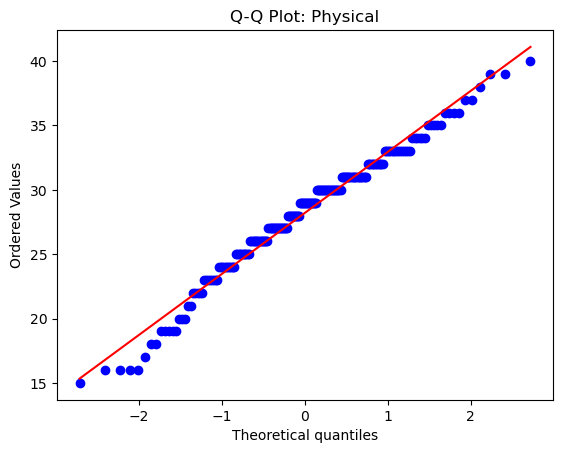

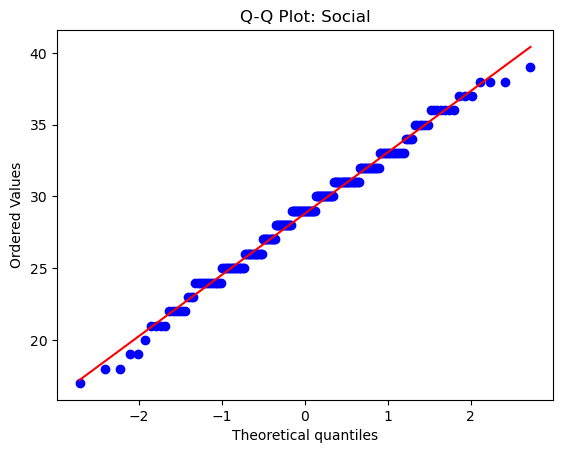

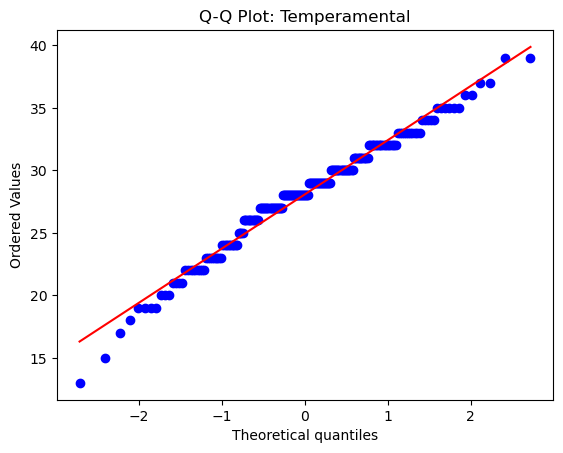

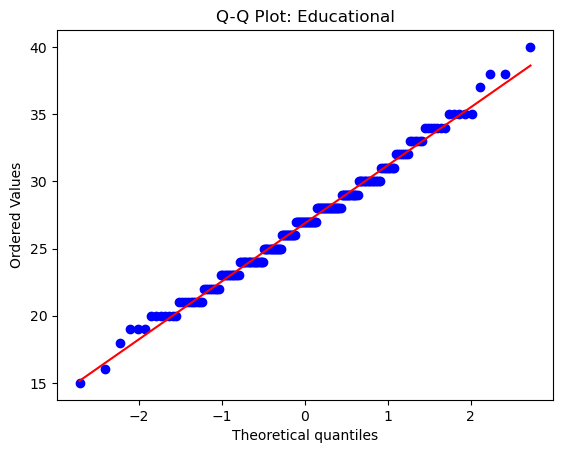

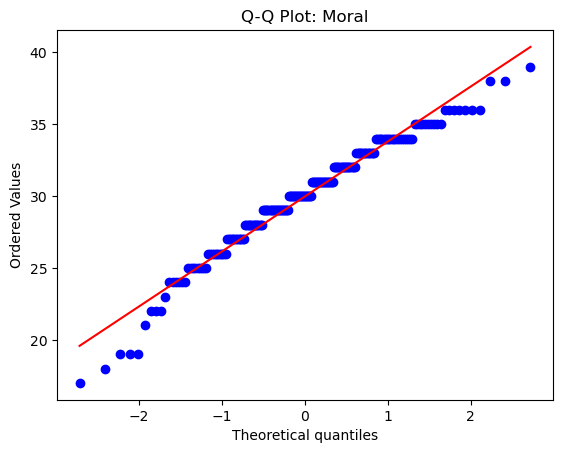

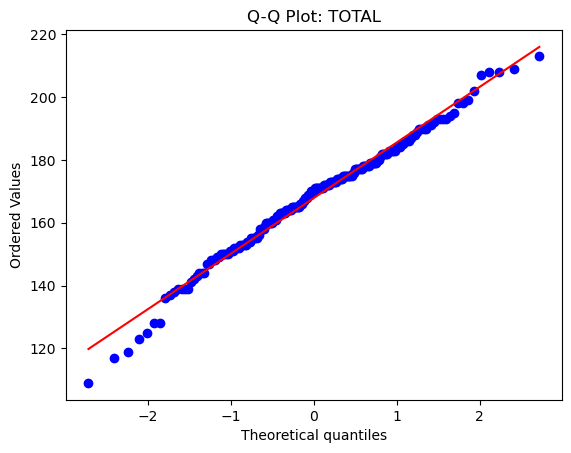

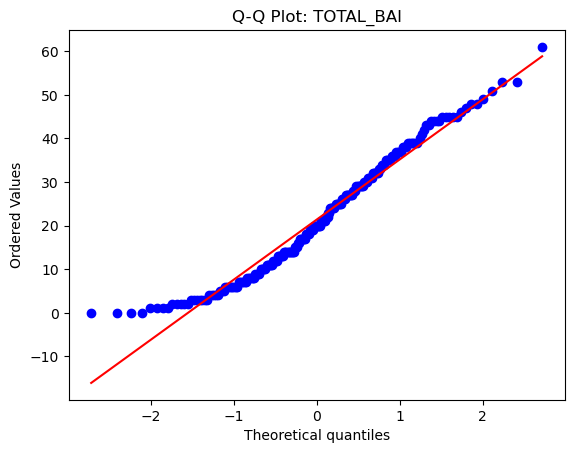

In [6]:
# Generate Q-Q plots
qq_plot(df['Physical'], 'Q-Q Plot: Physical')
qq_plot(df['Social'], 'Q-Q Plot: Social')
qq_plot(df['Temperamental'], 'Q-Q Plot: Temperamental')
qq_plot(df['Educational'], 'Q-Q Plot: Educational')
qq_plot(df['Moral'], 'Q-Q Plot: Moral')
qq_plot(df['TOTAL'], 'Q-Q Plot: TOTAL')
qq_plot(df['TOTAL_BAI'], 'Q-Q Plot: TOTAL_BAI')

We can see in our Q-Q plot above that the data values tend to closely follow the 45-degree, which means the data is likely normally distributed.

## Estimating Required Sample Size

In [7]:
import math
from scipy.stats import norm

def calculate_sample_size(CF, E, P):
    # Calculate Z-score for the given confidence level
    Z = norm.ppf(1 - (1 - CF) / 2)
    
    # Calculate sample size
    n = (Z**2 * P * (1 - P)) / (E**2)
    
    return math.ceil(n)  # Round up to the nearest whole number

# Example inputs
confidence_level = 0.95  # 95% confidence level
margin_of_error = 0.0675  # 6.75% margin of error
population_proportion = 0.5  # Estimated population proportion

# Calculate the required sample size
required_sample_size = calculate_sample_size(confidence_level, margin_of_error, population_proportion)

# Print the result
print("Required Sample Size:", required_sample_size)

Required Sample Size: 211


# Levene's test
A statistical test used to assess the equality of variances across multiple groups.

It's a crucial assumption for many parametric statistical tests, such as ANOVA and t-tests.

In [8]:
#checks variance between more than two groups
print("\nLevene's Test")
w, pvalue = stats.levene(df['Physical'], df['Social'],df['Temperamental'],df['Educational'],df['Moral'])
print("W ", end = ' ')
print(w)
print("P Value ", end = ' ')
print (pvalue)

if pvalue < 0.05:    # alpha value is 0.05 or 5%
    print("Groups do not have equal variance")
else:
    print("Groups have equal variance\n")


Levene's Test
W  1.882858875636339
P Value  0.11119479430444248
Groups have equal variance



The p-value is greater than 0.05 from Levene's test, indicating that we fail to reject the null hypothesis of equal variances. Therefore, the assumption of homogeneity of variance is satisfied.

# Box Plot

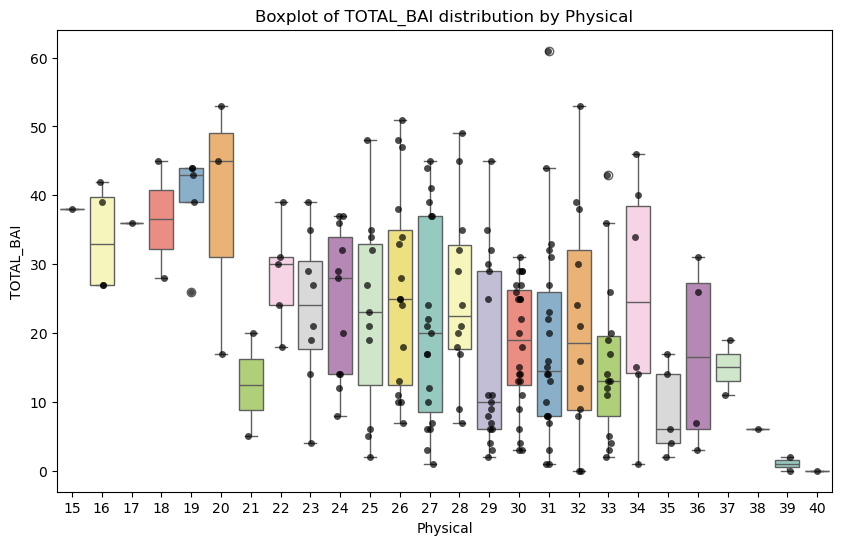

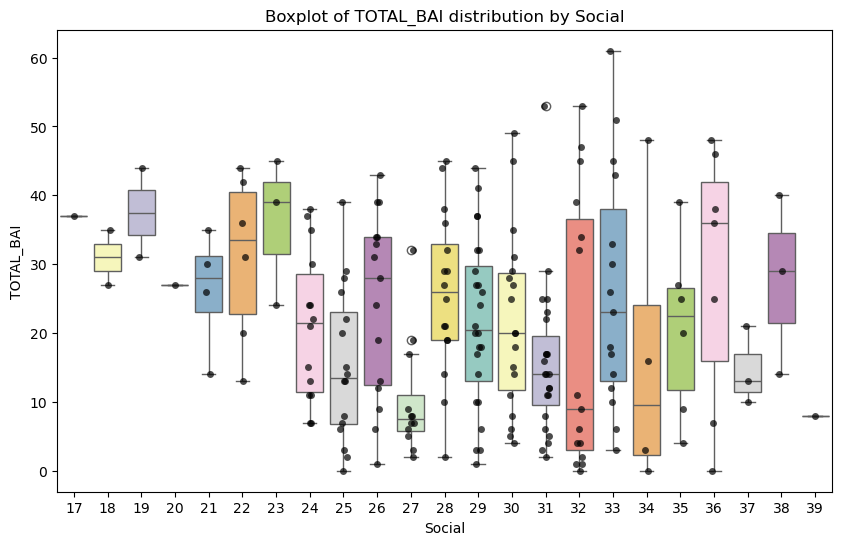

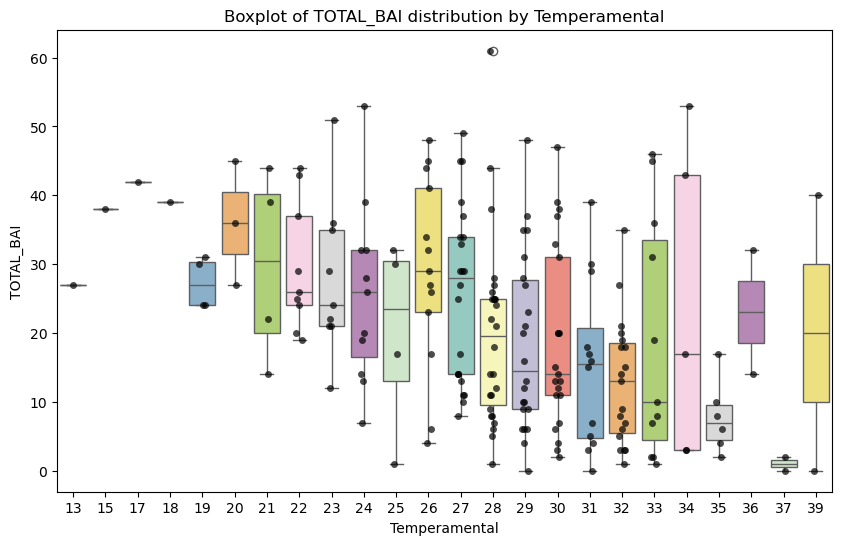

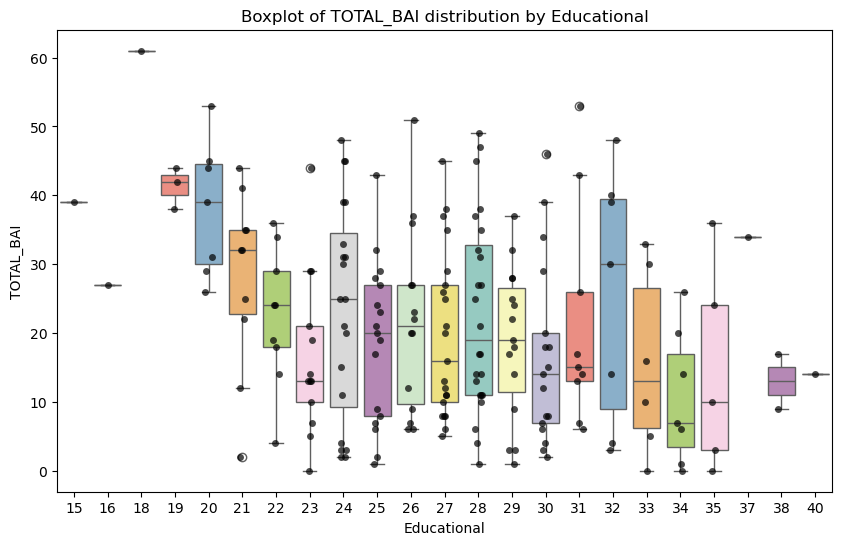

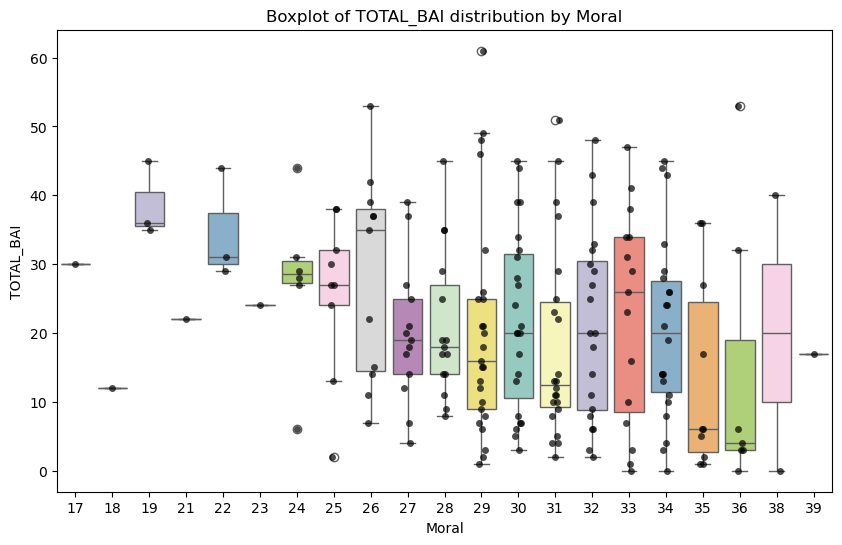

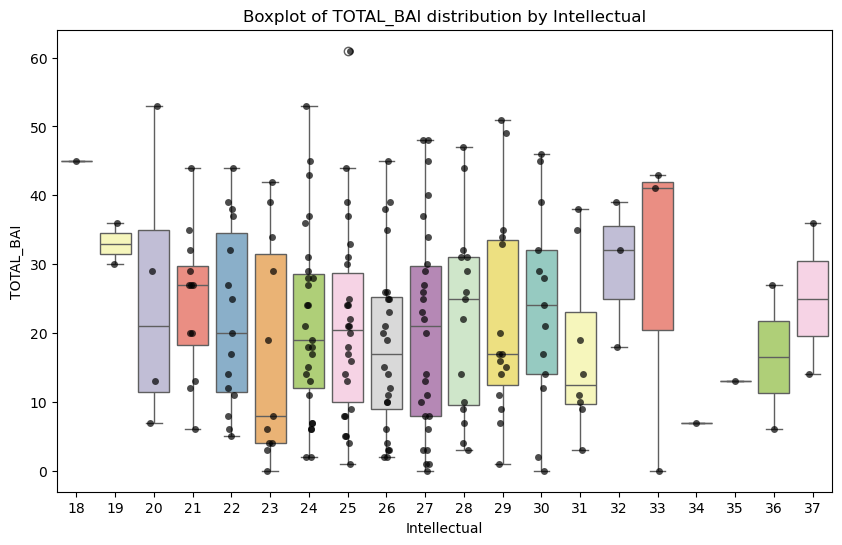

In [9]:
# List of independent variables
independent_vars = ['Physical', 'Social', 'Temperamental', 'Educational', 'Moral', 'Intellectual']

# Function to create boxplot with stripplot overlay
def plot_box_strip(df, feature, target):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target, data=df, palette="Set3", hue=feature, dodge=False, legend=False)
    sns.stripplot(x=feature, y=target, data=df, color='black', jitter=True, alpha=0.7)
    plt.title(f'Boxplot of {target} distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend([], [], frameon=False)
    plt.show()

# Generate plots for each independent variable
for var in independent_vars:
    plot_box_strip(df, var, 'TOTAL_BAI')


### Boxplot Inferences

#### Physical
- **Variability**: Significant variability in TOTAL_BAI across different Physical values.
- **Median Differences**: Medians vary, e.g., higher median for Physical value 20 compared to 21.
- **Outliers**: Presence of outliers indicates individuals with extreme TOTAL_BAI values.
- **Shape and Spread**: Distribution shapes vary, with some values showing symmetry and others skewness.

#### Social
- **Median Variability**: Medians differ across social groups.
- **Spread**: Different groups show varying IQR and overall spread.
- **Outliers**: Several groups have outliers, indicating extreme values.
- **Skewness**: Position of medians within boxes suggests skewness.

#### Temperamental
- **Variability and Medians**: Considerable variability and differing medians across Temperamental levels.
- **Outliers**: Outliers indicate extreme TOTAL_BAI values.
- **IQR and Skewness**: Varying IQR and skewness among levels.

#### Moral
- **Median and IQR**: Medians and IQR differ across Moral values.
- **Outliers**: Present in groups with higher Moral values.
- **Spread and Skewness**: Distribution spread and skewness vary among groups.

#### Intellectual
- **Medians**: Median TOTAL_BAI values vary across categories.
- **IQR and Outliers**: Differences in IQR and presence of outliers.
- **Symmetry and Skewness**: Median positions and whisker lengths indicate distribution characteristics.

### Summary
The boxplots highlight central tendencies, variability, and outliers across different self-concept dimensions, offering valuable insights into their relationship with TOTAL_BAI (Beck Anxiety Inventory). Overall, Physical, Temperamental, Moral, and Intellectual dimensions exhibit significant variability and outliers, suggesting a wide range of TOTAL_BAI values. In contrast, Social and Educational dimensions show more consistent TOTAL_BAI scores with fewer outliers, indicating that while some dimensions influence body adiposity index variability significantly, others maintain a more stable distribution.

While these observations offer insight into the data, an ANOVA can be used to determine whether there are statistically significant differences between the means of three or more independent (unrelated) groups.

# Independence of Observations
## Assumption:
Each student's entry in the questionnaire is independent of others.

## Conclusion:
Assuming the study design ensures that each student's anxiety level is from a unique student, the independence assumption is met.

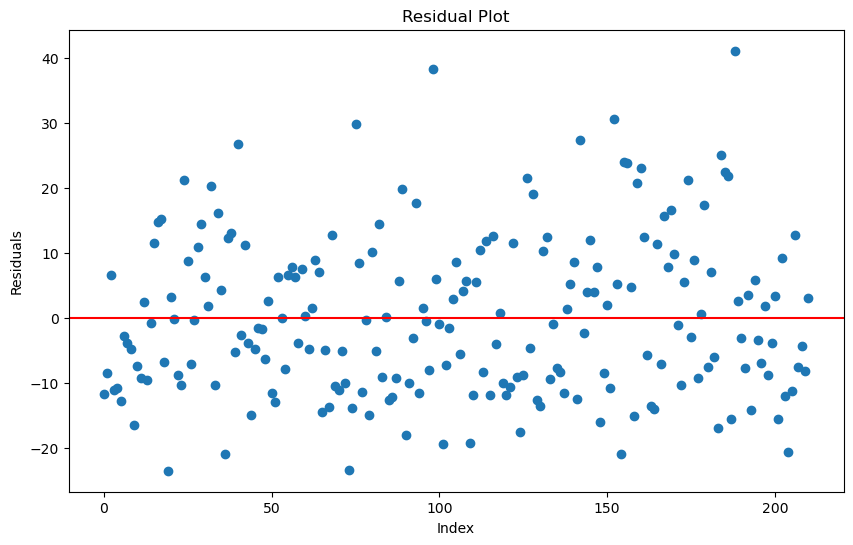

Durbin-Watson Statistic: 2.033097459984236


In [10]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

formula = 'TOTAL_BAI ~ Physical + Social + Temperamental + Educational + Moral + Intellectual'
model = ols(formula, data=df).fit()

# Get the residuals
residuals = model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(df.index, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

# Test for independence of residuals (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)


### Independence of Observations

The residual plot and Durbin-Watson statistic provide key insights into the independence of observations in the data:

#### Residual Plot:
The scatter plot of residuals around the horizontal line (y=0) shows no discernible pattern. This randomness indicates that the residuals are independently and identically distributed, suggesting that the assumption of independence is likely met.

#### Durbin-Watson Statistic:
The Durbin-Watson statistic is approximately 2.033, which is very close to 2. This suggests no significant autocorrelation in the residuals, implying that the residuals are independent of each other.

#### Conclusion:
The absence of patterns in the residual plot and the Durbin-Watson statistic close to 2 both support the conclusion that the independence assumption is met. Therefore, the responses (TOTAL_BAI values) in the dataset are not influenced by each other, validating the design of the study and the reliability of subsequent statistical tests (such as ANOVA).

# Approaches
> H1: Self-concept dimensions (i.e., physical, social, temperamental, educational, moral, and intellectual) increase the impact of anxiety.
Test: Multiple Linear Regression

    Reason: This test will help determine the impact of each self-concept dimension on anxiety (TOTAL_BAI).

> H2: There is a significant mean difference between the physical, social, temperamental, educational, intellectual, and moral self-concepts of males and females.
Test: MANOVA (Multivariate Analysis of Variance)

    Reason: This test will allow you to compare the means of multiple dependent variables (self-concept dimensions) between two groups (males and females).

> H3: There is a significant mean difference between the anxiety scores of males and females.
Test: Independent Samples t-test

    Reason: This test will compare the means of a single dependent variable (anxiety scores) between two independent groups (males and females).

> H4: There is a relation between overall self-concept and anxiety.
Test: Pearson Correlation

    Reason: This test will measure the strength and direction of the relationship between overall self-concept and anxiety.

## H1: Multiple Linear Regression

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Define the model
formula = 'TOTAL_BAI ~ Physical + Social + Temperamental + Educational + Moral + Intellectual'
model = ols(formula, data=df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TOTAL_BAI   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     9.088
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           8.23e-09
Time:                        03:00:22   Log-Likelihood:                -829.28
No. Observations:                 211   AIC:                             1673.
Df Residuals:                     204   BIC:                             1696.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        55.3233      9.015      6.137

## H2: Performing Multivariate ANOVA (MANOVA)

In [31]:
import statsmodels.api as sm 
from statsmodels.multivariate.manova import MANOVA
# Define the formula for MANOVA
formula = 'Physical + Social + Temperamental + Educational + Moral + Intellectual ~ Gender'

# Perform MANOVA
manova = MANOVA.from_formula(formula, data=df)

# Get the results
manova_results = manova.mv_test()

# Print the results
print(manova_results)

print("\n==================================================================================\n")

print("Effect Size:\n")

# Extract test statistics for Gender from MANOVA results
wilks_lambda = manova_results.results['Gender']['stat'].loc['Wilks\' lambda', 'Value']
pillais_trace = manova_results.results['Gender']['stat'].loc['Pillai\'s trace', 'Value']
hotellings_trace = manova_results.results['Gender']['stat'].loc['Hotelling-Lawley trace', 'Value']
roys_root = manova_results.results['Gender']['stat'].loc['Roy\'s greatest root', 'Value']
num_dv = 6  # Number of dependent variables

# Calculate partial eta squared for each test statistic
eta_squared_wilks = 1 - np.power(wilks_lambda, 1 / num_dv)
eta_squared_pillais = pillais_trace / (pillais_trace + num_dv - 1)
eta_squared_hotellings = hotellings_trace / (hotellings_trace + num_dv)
eta_squared_roys = roys_root / (1 + roys_root)

# Print the partial eta squared results
print(f"Partial Eta Squared (Wilks' Lambda): {eta_squared_wilks:.4f}")
print(f"Partial Eta Squared (Pillai's Trace): {eta_squared_pillais:.4f}")
print(f"Partial Eta Squared (Hotelling-Lawley Trace): {eta_squared_hotellings:.4f}")
print(f"Partial Eta Squared (Roy's Greatest Root): {eta_squared_roys:.4f}")


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0178 6.0000 204.0000 1872.2230 0.0000
         Pillai's trace  0.9822 6.0000 204.0000 1872.2230 0.0000
 Hotelling-Lawley trace 55.0654 6.0000 204.0000 1872.2230 0.0000
    Roy's greatest root 55.0654 6.0000 204.0000 1872.2230 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Gender         Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.9667 6.0000 204.0000  1.1723 0.3225
            Pillai's trace 0.0333 6.0000 204.

### H2: There is a significant mean difference between the physical, social, temperamental, educational, intellectual, and moral self-concepts of males and females.

**MANOVA Results**

The MANOVA results indicate no significant mean differences between males and females across the self-concept dimensions (Wilks' Λ = 0.9667, F(6, 204) = 1.1723, p = 0.3225). Additionally, the partial eta squared values suggest very small effect sizes (Wilks' Λ η² = 0.0056, Pillai's Trace η² = 0.0066, Hotelling-Lawley Trace η² = 0.0057, Roy's Greatest Root η² = 0.0333). 

**Thus, we fail to reject the null hypothesis and conclude that there is no significant mean difference in the self-concept dimensions between males and females.**

## H3: Independent Samples t-test

In [14]:
t_test = pg.ttest(df[df['Gender'] == 'M']['TOTAL_BAI'], df[df['Gender'] == 'F']['TOTAL_BAI'])
print(t_test)

               T         dof alternative     p-val         CI95%   cohen-d  \
T-test -0.980585  208.698451   two-sided  0.327933  [-5.65, 1.9]  0.134898   

         BF10     power  
T-test  0.236  0.164027  


## H4: Pearson Correlation

In [15]:
# Assuming 'Overall_Self_Concept' is a column in your DataFrame that represents overall self-concept
correlation = df['TOTAL'].corr(df['TOTAL_BAI'])
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: -0.35369309066990334


# Performing One-Way ANOVA
The assumptions of normality, homogeneity of variance, and independence are met; so we perform the ANOVA.

In [75]:
df['Gender_Numeric'] = df['Gender'].map({'M': 1, 'F': 2})

In [ ]:
pg.anova(data=df, dv='Gender_Numeric', between=['Physical','Social', 'Temperamental','Educational', 'Moral', 'Intellectual'], detailed=True)

An ANOVA revealed that the relationship between GPA and academic major was statistically significant, *F*(0.20) = 5.07, *p* < .05. The effect size, as measured by eta-squared, η² = 0.53, indicates a large effect.

A *p*-value less than 0.05 (or the chosen significance level) is typically considered statistically significant, suggesting that the observed effect is unlikely to be due to chance. In this case, since the *p*-value (0.03344) is less than the significance level of 0.05, we reject the null hypothesis and conclude that there are statistically significant differences in GPA based on major.

The effect size of η² = 0.5300 indicates that 53% of the variance in GPA is explained by the major. According to conventional benchmarks:

- Small effect: η² > 0.01
- Medium effect: η² > 0.06
- Large effect: η² ≥ 0.14

Thus, an eta-squared of 0.5300 represents a large effect size, suggesting a substantial impact of major on GPA.

# Post-Hoc Analysis:
# Tukey's Honest Significant Difference (HSD) Test

# One-Way Anova

In [38]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Reshape the dataframe to long format for ANOVA and Tukey HSD
df_melted = pd.melt(df, id_vars=['Gender'], value_vars=['Physical', 'Social', 'Temperamental', 'Educational', 'Moral', 'Intellectual'], var_name='Self_Concept', value_name='Score')

# Perform One-Way ANOVA
model = ols('Score ~ C(Self_Concept)', data=df_melted).fit()
anova_results = anova_lm(model)
print("ANOVA Results\n")

print(anova_results)

print("\n========================\n")

print("Tukey HSD Results\n")


# Conduct Tukey HSD test
tukey_result = pairwise_tukeyhsd(df_melted['Score'], df_melted['Self_Concept'], alpha=0.05)
print(tukey_result)


ANOVA Results

                     df        sum_sq     mean_sq          F        PR(>F)
C(Self_Concept)     5.0   2034.414692  406.882938  23.262564  2.088346e-22
Residual         1260.0  22038.521327   17.490890        NaN           NaN


Tukey HSD Results

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
 Educational  Intellectual  -0.8294 0.3219 -1.9915  0.3327  False
 Educational         Moral     3.09    0.0  1.9279  4.2522   True
 Educational      Physical   1.3318  0.014  0.1696  2.4939   True
 Educational        Social   1.9289    0.0  0.7668   3.091   True
 Educational Temperamental   1.2038 0.0373  0.0417  2.3659   True
Intellectual         Moral   3.9194    0.0  2.7573  5.0815   True
Intellectual      Physical   2.1611    0.0   0.999  3.3233   True
Intellectual        Social   2.7583    0.0  1.5962  3.9204   True
Intellectual 

One-Way ANOVA Result:
The One-Way ANOVA indicates a significant difference among the groups (F(5, 1260) = 23.26, p < 0.001).

Tukey's HSD Test Results:
The table summarizes pairwise comparisons between the self-concept dimensions. Significant differences (p < 0.05) indicate that the means of the two groups being compared are statistically different.

# STOP HERE

# Post-Hoc Analysis:
# Tukey's Honest Significant Difference (HSD) Test

Since the ANOVA indicated significant differences, we perform Tukey's HSD to identify which specific groups differ.

In [34]:
from scipy.stats import tukey_hsd

#Tukey Honestly Significant Difference Test
res = tukey_hsd(firstClass['GPA'], secondClass['GPA'], thirdClass['GPA'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.597     0.686    -1.759     0.565
 (0 - 2)      0.128     1.000    -1.034     1.290
 (0 - 3)      1.332     0.014     0.170     2.494
 (0 - 4)     -1.758     0.000    -2.920    -0.596
 (0 - 5)      2.161     0.000     0.999     3.323
 (1 - 0)      0.597     0.686    -0.565     1.759
 (1 - 2)      0.725     0.479    -0.437     1.887
 (1 - 3)      1.929     0.000     0.767     3.091
 (1 - 4)     -1.161     0.050    -2.323     0.001
 (1 - 5)      2.758     0.000     1.596     3.920
 (2 - 0)     -0.128     1.000    -1.290     1.034
 (2 - 1)     -0.725     0.479    -1.887     0.437
 (2 - 3)      1.204     0.037     0.042     2.366
 (2 - 4)     -1.886     0.000    -3.048    -0.724
 (2 - 5)      2.033     0.000     0.871     3.195
 (3 - 0)     -1.332     0.014    -2.494    -0.170
 (3 - 1)     -1.929     0.000    -3.091    -0.767
 (3 - 2)     -1.204     0.037   

Tukey's HSD post-hoc test was conducted following a one-way ANOVA to determine which pairs of majors had statistically significant differences in GPA. The results are as follows:

- **Comparison: Major 0 (Arts) vs. Major 1 (Humanities):** The analysis revealed a statistically significant difference in GPA between Arts and Humanities, with a mean difference of -0.43, 95% CI [-0.82, -0.03], *p* = .037. This indicates that Humanities majors have a significantly higher GPA than Arts majors.
  
- **Comparison: Major 0 (Arts) vs. Major 2 (Science):** There was no statistically significant difference in GPA between Arts and Science, with a mean difference of -0.08, 95% CI [-0.47, 0.32], *p* = .860.

- **Comparison: Major 1 (Humanities) vs. Major 2 (Science):** The difference in GPA between Humanities and Science was not statistically significant, with a mean difference of 0.35, 95% CI [-0.05, 0.75], *p* = .084.

### Conclusion
The results of Tukey's HSD indicate that **Humanities majors perform significantly better than Arts majors in terms of GPA.** No significant differences were found between other major pairs.

In [ ]:
#Independent t-tests

arts_gpa = df[df['Major'] == 'Arts']['GPA']
humanities_gpa = df[df['Major'] == 'Humanities']['GPA']
science_gpa = df[df['Major'] == 'Science']['GPA']

# Performing the t-test between majors
t_test_results_1 = pingouin.ttest(arts_gpa, humanities_gpa, paired=False)
t_test_results_2 = pingouin.ttest(arts_gpa, science_gpa, paired=False)
t_test_results_3 = pingouin.ttest(humanities_gpa, science_gpa, paired=False)

# Displaying the results of the t-test
print("\nIndependent Samples T-test to compare the means of Arts and Humanities majors:\n")
print(t_test_results_1)
print("--------------------------")
print("\nIndependent Samples T-test to compare the means of Arts and Science majors:")
print(t_test_results_2)
print("--------------------------")
print("\nIndependent Samples T-test to compare the means of Humanities and Science majors:")
print(t_test_results_3)


Independent Samples T-test to compare the means of Arts and Humanities majors:

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -2.745626    6   two-sided  0.033485  [-0.66, -0.04]  1.941451  2.428   

           power  
T-test  0.631687  
--------------------------

Independent Samples T-test to compare the means of Arts and Science majors:
               T  dof alternative    p-val         CI95%   cohen-d   BF10  \
T-test  0.557086    6   two-sided  0.59762  [-0.25, 0.4]  0.393919  0.574   

           power  
T-test  0.076087  
--------------------------

Independent Samples T-test to compare the means of Humanities and Science majors:
               T  dof alternative    p-val         CI95%   cohen-d   BF10  \
T-test  2.612809    6   two-sided  0.03997  [0.03, 0.82]  1.847535  2.184   

           power  
T-test  0.590045  


Pairwise independent samples t-tests are conducted to compare the means of two independent groups at a time. In this case, with three academic majors, there are three possible pairwise comparisons:

Science vs. Humanities
Science vs. Arts
Humanities vs. Arts

While ANOVA indicates that at least one group mean is different, it does not specify which specific groups differ. Pairwise t-tests help identify where these differences lie.

In [ ]:
# Performing pairwise independent samples t-tests with Bonferroni correction
pairwise_results = pingouin.pairwise_ttests(
    dv='GPA',           # Dependent Variable: GPA
    between='Major',    # Independent Variable: Major
    data=df,            # DataFrame containing the data
    padjust='bonferroni',  # Adjust p-values for multiple comparisons using Bonferroni correction
    effsize='cohen'     # Calculate Cohen's d for effect size
)

print("\nPairwise Independent Samples T-tests:")
print(pairwise_results)


Pairwise Independent Samples T-tests:
  Contrast           A           B  Paired  Parametric         T  dof  \
0    Major        Arts  Humanities   False        True -2.745626  6.0   
1    Major        Arts     Science   False        True  0.557086  6.0   
2    Major  Humanities     Science   False        True  2.612809  6.0   

  alternative     p-unc    p-corr    p-adjust   BF10     cohen  
0   two-sided  0.033485  0.100455  bonferroni  2.428 -1.941451  
1   two-sided  0.597620  1.000000  bonferroni  0.574  0.393919  
2   two-sided  0.039970  0.119909  bonferroni  2.184  1.847535  


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


A series of independent samples *t*-tests were conducted to compare GPA between different academic majors (Arts, Humanities, and Science). The results are presented below:

- **Arts vs. Humanities:** The analysis revealed a statistically significant difference in GPA between Arts and Humanities majors before adjustment, *t*(6) = -2.75, *p* = .033. However, after applying the Bonferroni correction, the difference was no longer statistically significant, *p* = .100.

- **Arts vs. Science:** No significant difference in GPA was found between Arts and Science majors, *t*(6) = 0.56, *p* = .598. This result remained non-significant even after adjustment, *p* = 1.000.

- **Humanities vs. Science:** The unadjusted analysis indicated a statistically significant difference in GPA between Humanities and Science majors, *t*(6) = 2.61, *p* = .040. However, the difference did not remain significant after Bonferroni correction, *p* = .120.

These findings suggest that while there were initial indications of significant differences between Arts and Humanities and Humanities and Science majors, these differences did not hold after correcting for multiple comparisons.

Humanities majors initially showed significant differences compared to both Arts and Science, suggesting that Humanities may be the best-performing group based on the unadjusted results.

# Answer b

In [ ]:
print("First Class: M = " + str(round(firstClass['GPA'].mean(), 2)) + " SD = " + str(round(firstClass['GPA'].std(), 2)))
print("Second Class: M = " +  str(round(secondClass['GPA'].mean(), 2)) + " SD = " + str(round(secondClass['GPA'].std(), 2)))
print("Third Class: M = " +  str(round(thirdClass['GPA'].mean(), 2)) + " SD = " + str(round(thirdClass['GPA'].std(), 2)))

First Class: M = 2.95 SD = 0.24
Second Class: M = 3.38 SD = 0.22
Third Class: M = 3.02 SD = 0.13


Humanities majors had the highest mean GPA (*M* = 3.38), followed by Arts majors (*M* = 3.03) and Science majors (*M* = 2.95). Therefore, students majoring in Humanities were the best-performing group on average based on their GPA. This is consistent with the results of the independent samples *t*-tests presented above.

### Apart from the textbook, I used the below resources to learn and complete this assignment:

# Reference:
1. https://www.investopedia.com/terms/t/t-test.asp
2. https://www.youtube.com/watch?v=c9ombGmaEy8 - Data Tab Resources to understand definitions
3. ChatGPT and Gemini to take help if any errors while coding and to verify written APA style guide.
4. https://stackoverflow.com/